In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_file_path = '/content/drive/My Drive/360 Rocks.zip'  # Path to my zip file
new_folder_path = '/content/360_rocks_images'  # New folder where images will be stored

os.makedirs(new_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(new_folder_path)

extracted_files = [os.path.join(new_folder_path, f) for f in os.listdir(new_folder_path) if os.path.isfile(os.path.join(new_folder_path, f))]
print(f"Extracted files: {extracted_files}")


Extracted files: ['/content/360_rocks_images/S_Sandstone_03.jpg', '/content/360_rocks_images/I_Pumice_08.jpg', '/content/360_rocks_images/S_Bituminous Coal_09.jpg', '/content/360_rocks_images/M_Migmatite_10.jpg', '/content/360_rocks_images/I_Peridotite_10.jpg', '/content/360_rocks_images/I_Diorite_08.jpg', '/content/360_rocks_images/S_Conglomerate_06.jpg', '/content/360_rocks_images/M_Quartzite_02.jpg', '/content/360_rocks_images/I_Diorite_01.jpg', '/content/360_rocks_images/I_Peridotite_09.jpg', '/content/360_rocks_images/M_Anthracite_01.jpg', '/content/360_rocks_images/I_Andesite_01.jpg', '/content/360_rocks_images/I_Andesite_02.jpg', '/content/360_rocks_images/I_Gabbro_11.jpg', '/content/360_rocks_images/I_Obsidian_02.jpg', '/content/360_rocks_images/I_Basalt_09.jpg', '/content/360_rocks_images/M_Quartzite_12.jpg', '/content/360_rocks_images/S_Conglomerate_07.jpg', '/content/360_rocks_images/I_Pumice_04.jpg', '/content/360_rocks_images/M_Anthracite_03.jpg', '/content/360_rocks_image

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(extracted_files, columns=['ImagePath'])
df.head()

ImagePath
0       /content/360_rocks_images/S_Sandstone_03.jpg
1          /content/360_rocks_images/I_Pumice_08.jpg
2  /content/360_rocks_images/S_Bituminous Coal_09...
3       /content/360_rocks_images/M_Migmatite_10.jpg
4      /content/360_rocks_images/I_Peridotite_10.jpg

In [6]:
import glob
from PIL import Image

for img_path in glob.glob(f'{new_folder_path}/*.jpg'):
  with Image.open(img_path) as img:
    print(f"Image: {img_path}, Size: {img.size}")

Image: /content/360_rocks_images/S_Sandstone_03.jpg, Size: (800, 800)
Image: /content/360_rocks_images/I_Pumice_08.jpg, Size: (800, 800)
Image: /content/360_rocks_images/S_Bituminous Coal_09.jpg, Size: (800, 800)
Image: /content/360_rocks_images/M_Migmatite_10.jpg, Size: (800, 800)
Image: /content/360_rocks_images/I_Peridotite_10.jpg, Size: (800, 800)
Image: /content/360_rocks_images/I_Diorite_08.jpg, Size: (800, 800)
Image: /content/360_rocks_images/S_Conglomerate_06.jpg, Size: (800, 800)
Image: /content/360_rocks_images/M_Quartzite_02.jpg, Size: (800, 800)
Image: /content/360_rocks_images/I_Diorite_01.jpg, Size: (800, 800)
Image: /content/360_rocks_images/I_Peridotite_09.jpg, Size: (800, 800)
Image: /content/360_rocks_images/M_Anthracite_01.jpg, Size: (800, 800)
Image: /content/360_rocks_images/I_Andesite_01.jpg, Size: (800, 800)
Image: /content/360_rocks_images/I_Andesite_02.jpg, Size: (800, 800)
Image: /content/360_rocks_images/I_Gabbro_11.jpg, Size: (800, 800)
Image: /content/360_

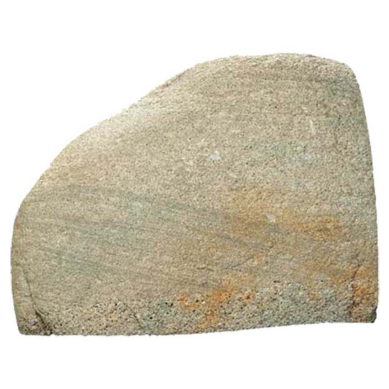

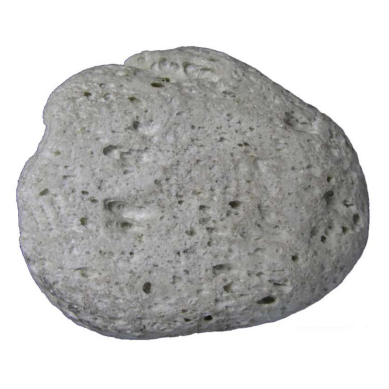

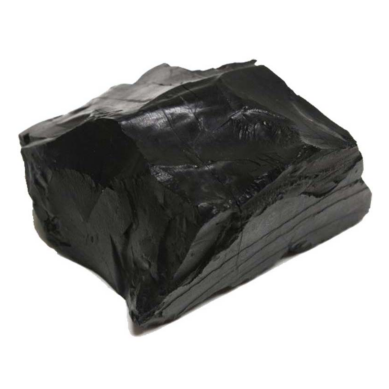

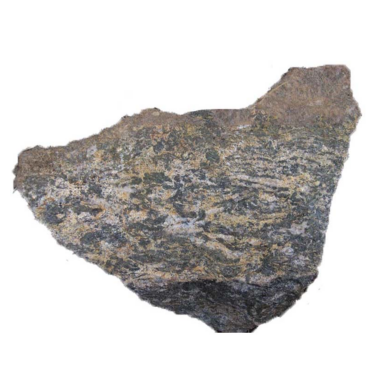

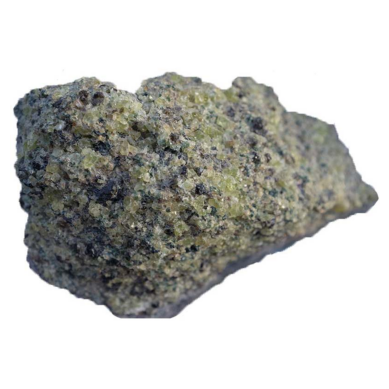

In [7]:
import matplotlib.pyplot as plt

for i, image_file in enumerate(extracted_files[:5]):
  image_path = os.path.join(new_folder_path, image_file)
  image = Image.open(image_path)

  plt.figure(i)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

In [8]:
# Question 1

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
images = []

for image_file in extracted_files[:360]:
  image_path = os.path.join(new_folder_path, image_file)
  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = np.array(image)
  images.append(image)

images = np.array(images)
print("Og images shape:", images.shape)

n_samples, h, w, c = images.shape
images_flattened = images.reshape(n_samples, -1)

print("Flattened images shape:", images_flattened.shape)

Og images shape: (360, 224, 224, 3)
Flattened images shape: (360, 150528)


In [10]:
ss = StandardScaler()
images_flattened_scaled = ss.fit_transform(images_flattened)

pca = PCA(n_components = 139)
images_pca = pca.fit_transform(images_flattened_scaled)

print("Shape after PCA:", images_pca.shape)

Shape after PCA: (360, 139)


In [11]:
explained_variance_ratio = pca.explained_variance_ratio_

In [11]:
cumulative_variance = np.cumsum(explained_variance_ratio)

In [12]:
print(cumulative_variance)

[0.18626909 0.31372719 0.36277811 0.39423096 0.42364052 0.44810858
 0.46965598 0.48830096 0.50572254 0.52193121 0.53636258 0.54963199
 0.56148003 0.57300101 0.58324626 0.59305813 0.60274019 0.611431
 0.61941787 0.6271899  0.63483125 0.64181235 0.64836288 0.65469779
 0.6606952  0.66654765 0.67203896 0.67750643 0.68287986 0.68804915
 0.6929599  0.69761724 0.70212476 0.70643846 0.71070886 0.71480925
 0.71877823 0.72268325 0.72642872 0.73017033 0.7337542  0.73730598
 0.74079764 0.74410409 0.74734455 0.75052236 0.75360088 0.75666492
 0.75960574 0.762443   0.76520466 0.76794548 0.77064325 0.77331078
 0.77591932 0.7784239  0.78092291 0.78334807 0.78572589 0.7880707
 0.79039553 0.79268478 0.79492334 0.79714801 0.79934164 0.80149502
 0.80359799 0.8056994  0.80777765 0.80975395 0.81170332 0.81362616
 0.81552775 0.81739693 0.81919629 0.82095437 0.82270474 0.82443883
 0.8261627  0.82786404 0.82955282 0.83121897 0.83285845 0.83447918
 0.83608067 0.83766393 0.83923288 0.84078205 0.84232018 0.8438248

**How many components do you need to preserve 90% of the variance?**

-> 139 components are needed to preserve 90% variance.

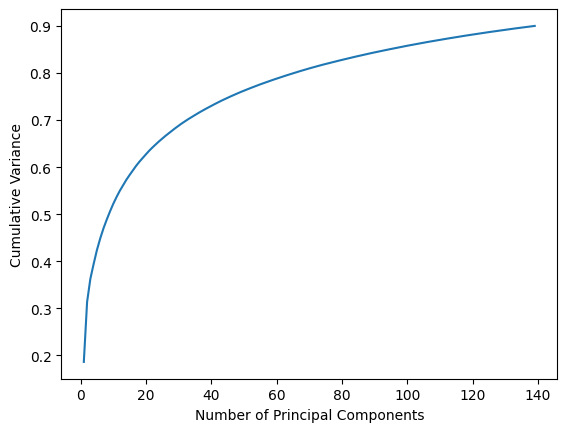

In [13]:
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")
plt.show()

In [14]:
# Question 2

reconstructed_images_flattened = pca.inverse_transform(images_pca)

reconstructed_images_flattened = ss.inverse_transform(reconstructed_images_flattened)

reconstructed_images = reconstructed_images_flattened.reshape(n_samples, h, w, c)

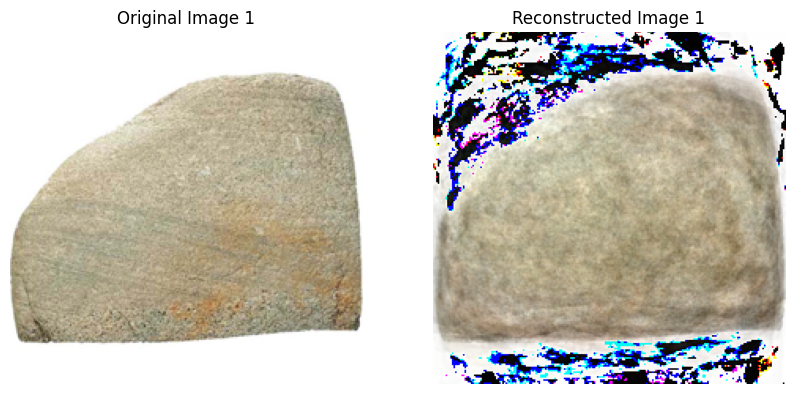

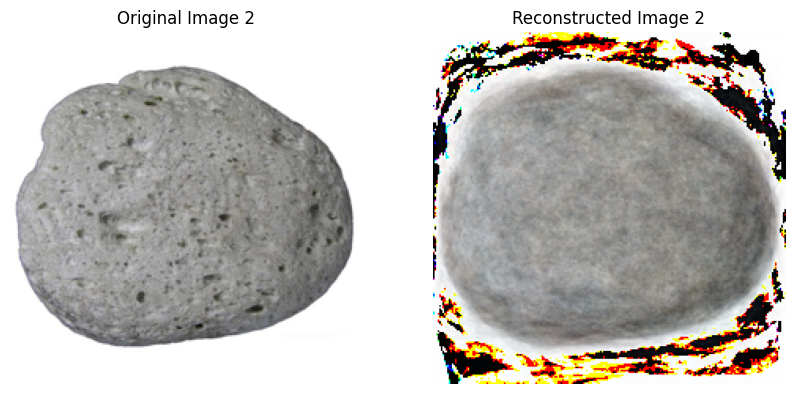

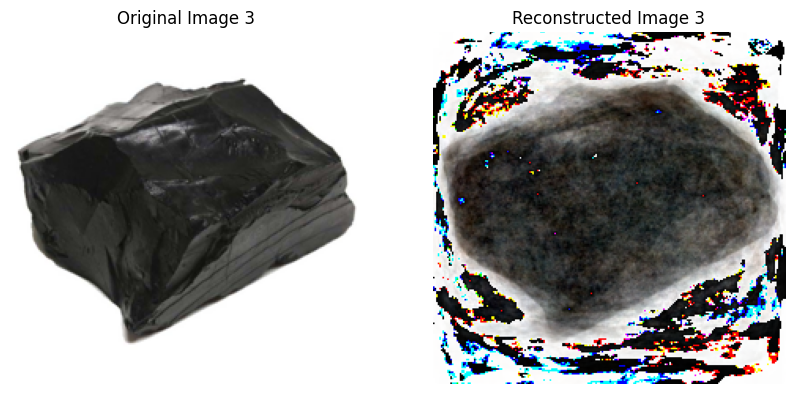

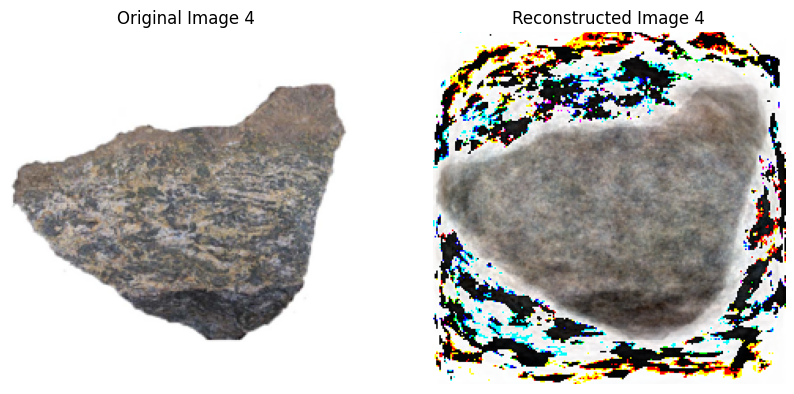

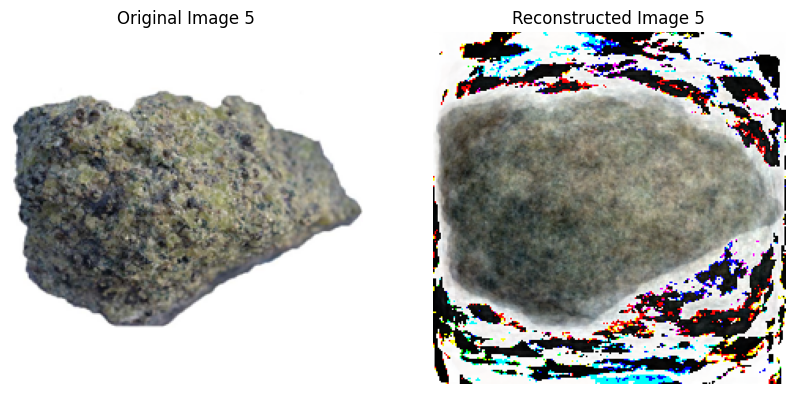

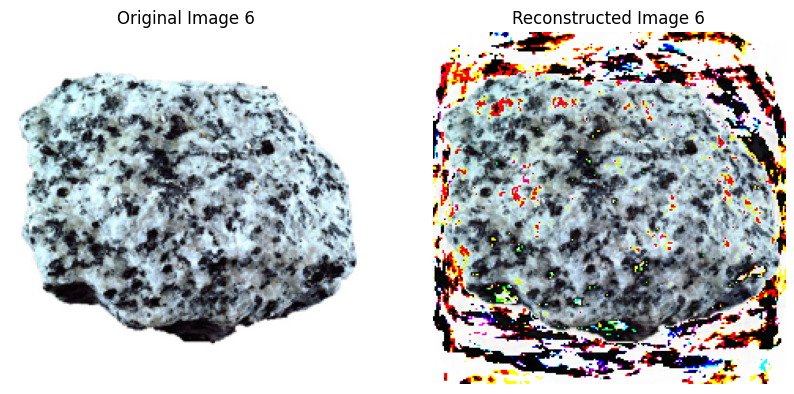

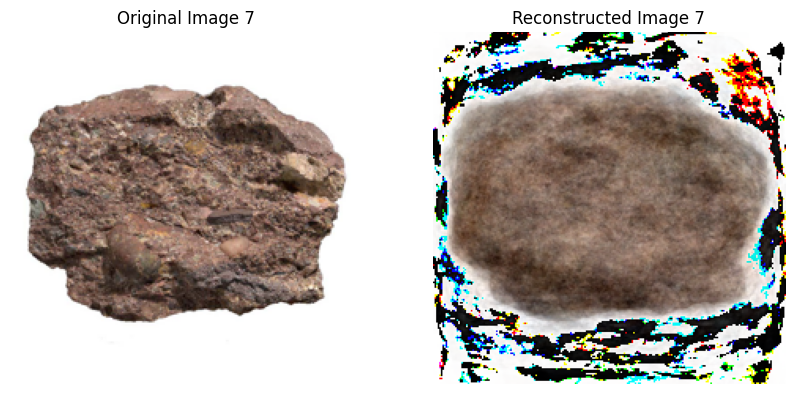

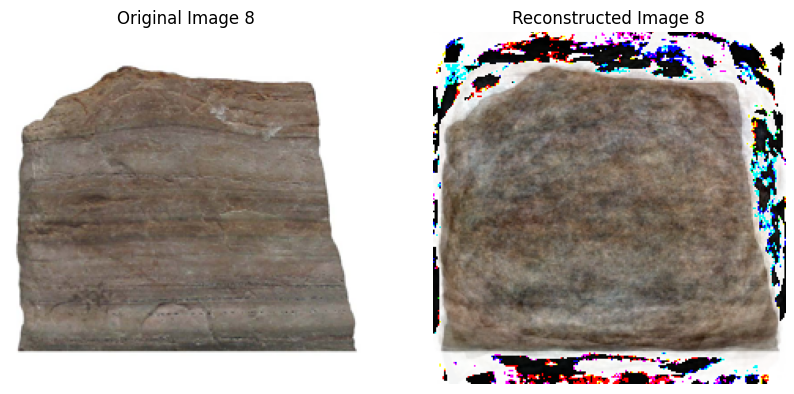

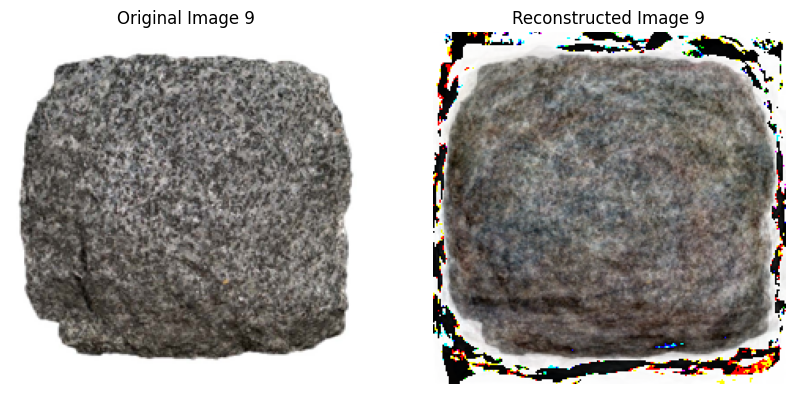

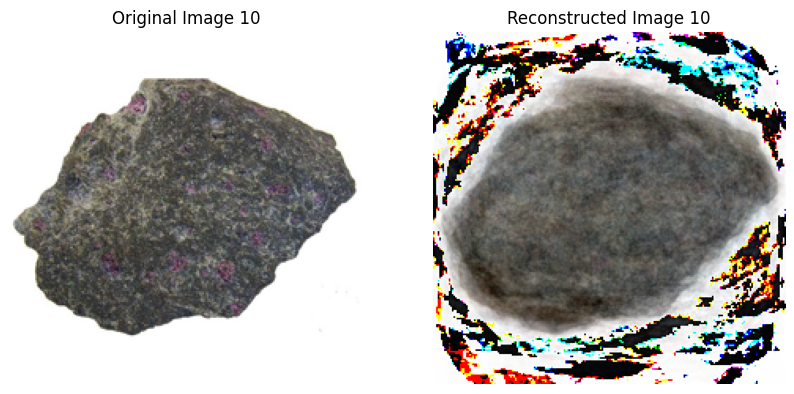

In [15]:
for i in range(10):
  plt.figure(figsize=(10,5))

  plt.subplot(1,2,1)
  plt.imshow(images[i].astype(np.uint8))
  plt.title(f"Original Image {i+1}")
  plt.axis("off")


  plt.subplot(1,2,2)
  plt.imshow(reconstructed_images[i].astype(np.uint8))
  plt.axis("off")
  plt.title(f"Reconstructed Image {i+1}")

  plt.show()

In [16]:


# Question 3A

pca_2_component = PCA(n_components=2)
images_pca_2_component = pca_2_component.fit_transform(images_flattened_scaled)

pca_2_component.explained_variance_ratio_


array([0.18626909, 0.1274581 ])

In [17]:
np.cumsum(pca_2_component.explained_variance_ratio_)

array([0.18626909, 0.31372719])

**How much of the variance is explained with the first two principal components?**

-> 31. 37% of the variance is explained by the first two principal components


In [18]:
# Question 3B

from sklearn.preprocessing import LabelEncoder

labels = []
for image_file in extracted_files:
  category = image_file[26]
  labels.append(category)

labels

['S',
 'I',
 'S',
 'M',
 'I',
 'I',
 'S',
 'M',
 'I',
 'I',
 'M',
 'I',
 'I',
 'I',
 'I',
 'I',
 'M',
 'S',
 'I',
 'M',
 'I',
 'M',
 'M',
 'I',
 'I',
 'S',
 'S',
 'I',
 'I',
 'S',
 'S',
 'I',
 'M',
 'M',
 'M',
 'S',
 'I',
 'S',
 'M',
 'I',
 'S',
 'S',
 'I',
 'M',
 'I',
 'I',
 'I',
 'I',
 'S',
 'M',
 'S',
 'S',
 'S',
 'S',
 'S',
 'M',
 'I',
 'I',
 'I',
 'S',
 'M',
 'I',
 'M',
 'S',
 'M',
 'S',
 'M',
 'I',
 'I',
 'I',
 'M',
 'I',
 'I',
 'S',
 'I',
 'M',
 'S',
 'M',
 'I',
 'M',
 'S',
 'S',
 'S',
 'M',
 'I',
 'I',
 'S',
 'I',
 'I',
 'S',
 'M',
 'M',
 'S',
 'M',
 'I',
 'M',
 'I',
 'M',
 'S',
 'S',
 'M',
 'I',
 'I',
 'M',
 'M',
 'M',
 'M',
 'M',
 'I',
 'S',
 'S',
 'M',
 'S',
 'M',
 'I',
 'S',
 'M',
 'I',
 'S',
 'I',
 'M',
 'S',
 'M',
 'M',
 'S',
 'M',
 'S',
 'M',
 'M',
 'I',
 'I',
 'I',
 'S',
 'I',
 'S',
 'I',
 'M',
 'I',
 'I',
 'M',
 'I',
 'I',
 'M',
 'M',
 'I',
 'M',
 'S',
 'S',
 'S',
 'I',
 'S',
 'M',
 'I',
 'I',
 'S',
 'S',
 'S',
 'S',
 'S',
 'I',
 'S',
 'M',
 'I',
 'M',
 'M',
 'S',
 'M'

In [19]:
len(images_pca_2_component)

360

In [20]:
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
'''
plt.figure(figsize=(10, 6))

scatter = plt.scatter(images_pca_2_component[:, 0], images_pca_2_component[:, 1], c=encoded_labels)
plt.colorbar(scatter, label='Rock Category')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('2D Scatterplot of Rock Images')
handles, _ = scatter.legend_elements()
rock_labels=['I', 'M', 'S']
plt.legend(handles, rock_labels)

plt.show()
'''

'\nplt.figure(figsize=(10, 6))\n\nscatter = plt.scatter(images_pca_2_component[:, 0], images_pca_2_component[:, 1], c=encoded_labels)\nplt.colorbar(scatter, label=\'Rock Category\')\n\nplt.xlabel("Principal Component 1")\nplt.ylabel("Principal Component 2")\nplt.title(\'2D Scatterplot of Rock Images\')\nhandles, _ = scatter.legend_elements()\nrock_labels=[\'I\', \'M\', \'S\']\nplt.legend(handles, rock_labels)\n\nplt.show()\n'

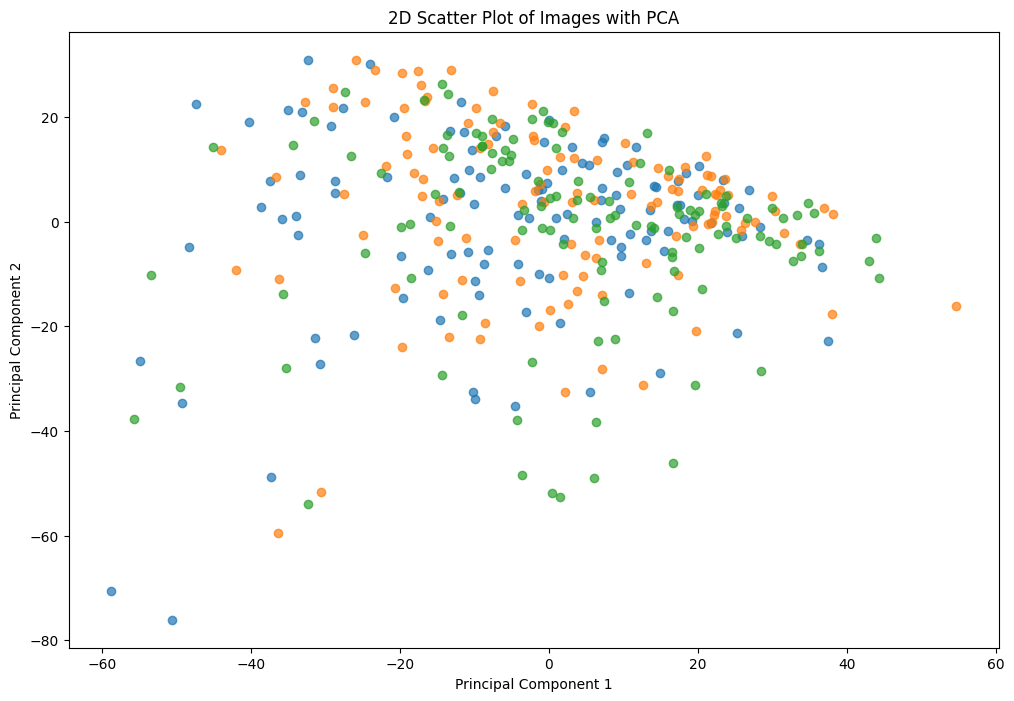

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from sklearn.preprocessing import StandardScaler

images = []

for file in extracted_files:
    image_path = os.path.join(new_folder_path, file)
    image = Image.open(image_path)
    resized_image = image.resize((25, 25))
    images.append(resized_image)

images = np.array(images)

n_samples, h, w, c = images.shape
flattened_images = images.reshape(n_samples, -1)

scaler = StandardScaler()
transformed_data_scaled = scaler.fit_transform(flattened_images)

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(transformed_data_scaled)

plt.figure(figsize=(12, 8))
for label in np.unique(encoded_labels):
    indices = np.where(np.array(encoded_labels) == label)[0]
    plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1],
                label=f'Category {label}', alpha=0.7)

plt.title('2D Scatter Plot of Images with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

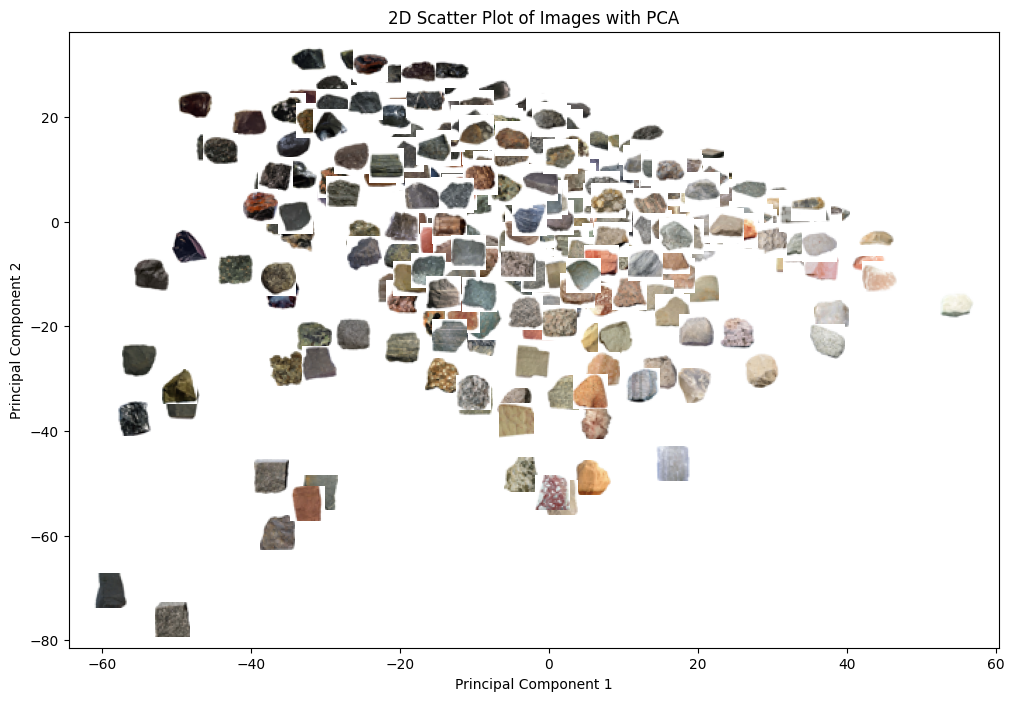

In [22]:
plt.figure(figsize=(12, 8))
for label in np.unique(encoded_labels):
    indices = np.where(np.array(encoded_labels) == label)[0]
    plt.scatter(transformed_data[indices, 0], transformed_data[indices, 1],
                label=f'Category {label}', alpha=0.7)

for i in range(len(images)):
    image_data = images[i]
    image_pil = Image.fromarray(image_data)
    image_thumbnail = image_pil.resize((25, 25))
    image = OffsetImage(image_thumbnail)#, zoom=1.0)
    ab = AnnotationBbox(image, transformed_data[i], frameon=False)
    plt.gca().add_artist(ab)

plt.title('2D Scatter Plot of Images with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [23]:
len(images)

360

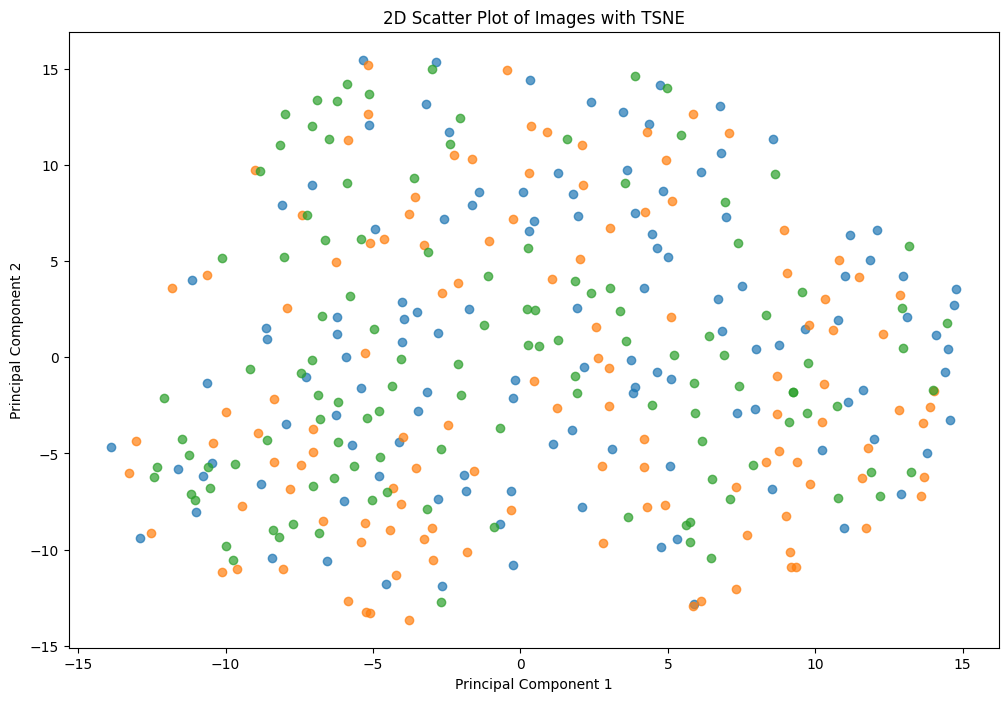

In [24]:
from sklearn.manifold import TSNE

tsne_transformed_data_scaled = scaler.fit_transform(flattened_images)

model = TSNE(n_components=2, random_state=42)
tsne_transformed_data = model.fit_transform(tsne_transformed_data_scaled)

plt.figure(figsize=(12, 8))
for label in np.unique(encoded_labels):
    indices = np.where(np.array(encoded_labels) == label)[0]
    plt.scatter(tsne_transformed_data[indices, 0], tsne_transformed_data[indices, 1],
                label=f'Category {label}', alpha=0.7)

plt.title('2D Scatter Plot of Images with TSNE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



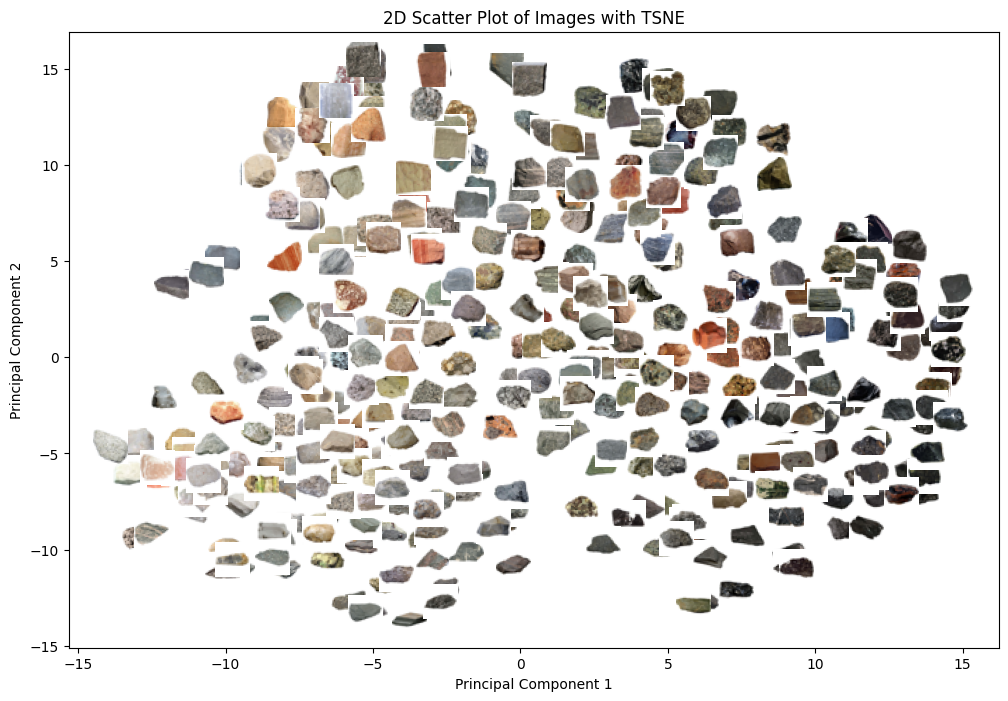

In [25]:
plt.figure(figsize=(12, 8))
for label in np.unique(encoded_labels):
    indices = np.where(np.array(encoded_labels) == label)[0]
    plt.scatter(tsne_transformed_data[indices, 0], tsne_transformed_data[indices, 1],
                label=f'Category {label}', alpha=0.7)

for i in range(len(images)):
    image_data = images[i]
    image_pil = Image.fromarray(image_data)
    image_thumbnail = image_pil.resize((25, 25))
    image = OffsetImage(image_thumbnail)#, zoom=1.0)
    ab = AnnotationBbox(image, tsne_transformed_data[i], frameon=False)
    plt.gca().add_artist(ab)

plt.title('2D Scatter Plot of Images with TSNE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

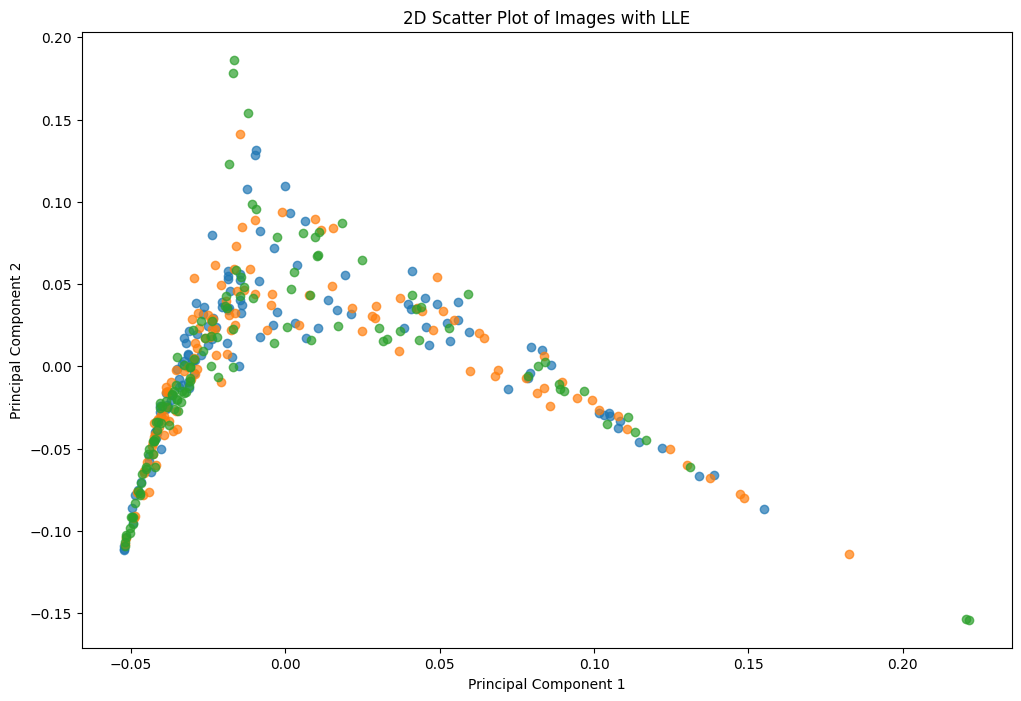

In [26]:
from sklearn.manifold import LocallyLinearEmbedding

lle_transformed_data_scaled = scaler.fit_transform(flattened_images)

model = LocallyLinearEmbedding(n_components=2, random_state=42)
lle_transformed_data = model.fit_transform(lle_transformed_data_scaled)

plt.figure(figsize=(12, 8))
for label in np.unique(encoded_labels):
    indices = np.where(np.array(encoded_labels) == label)[0]
    plt.scatter(lle_transformed_data[indices, 0], lle_transformed_data[indices, 1],
                label=f'Category {label}', alpha=0.7)

plt.title('2D Scatter Plot of Images with LLE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


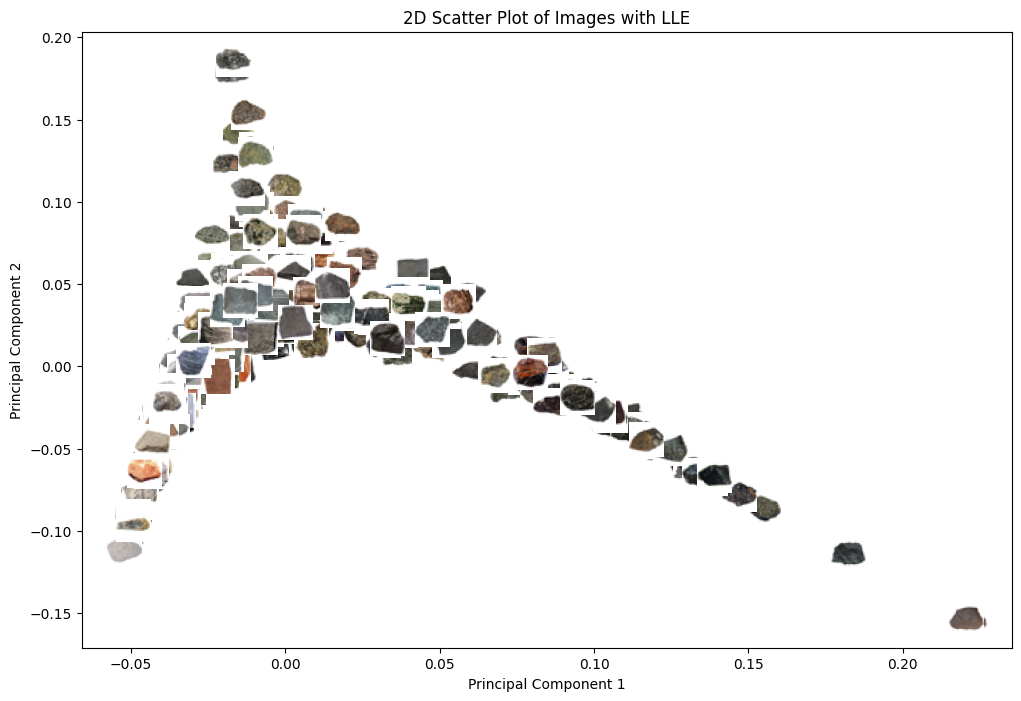

In [27]:
plt.figure(figsize=(12, 8))
for label in np.unique(encoded_labels):
    indices = np.where(np.array(encoded_labels) == label)[0]
    plt.scatter(lle_transformed_data[indices, 0], lle_transformed_data[indices, 1],
                label=f'Category {label}', alpha=0.7)

for i in range(len(images)):
    image_data = images[i]
    image_pil = Image.fromarray(image_data)
    image_thumbnail = image_pil.resize((25, 25))
    image = OffsetImage(image_thumbnail)#, zoom=1.0)
    ab = AnnotationBbox(image, lle_transformed_data[i], frameon=False)
    plt.gca().add_artist(ab)

plt.title('2D Scatter Plot of Images with LLE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

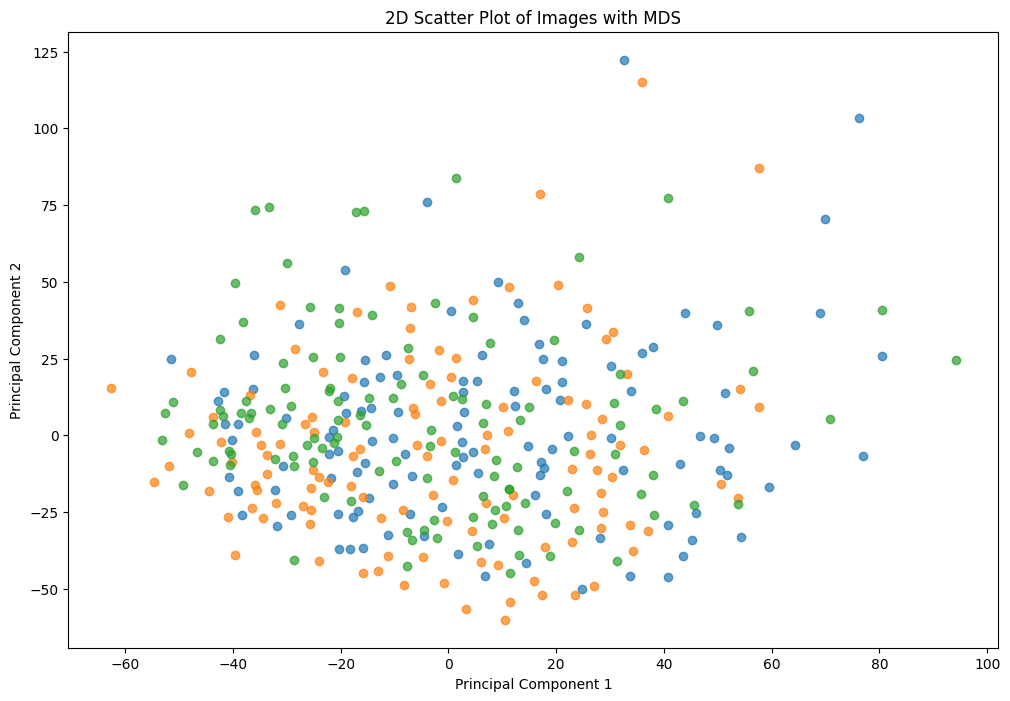

In [28]:
from sklearn.manifold import MDS

mds_transformed_data_scaled = scaler.fit_transform(flattened_images)

model = MDS(n_components=2, random_state = 42)
mds_transformed_data = model.fit_transform(mds_transformed_data_scaled)

plt.figure(figsize=(12, 8))
for label in np.unique(encoded_labels):
  indices = np.where(np.array(encoded_labels) == label)[0]
  plt.scatter(mds_transformed_data[indices, 0], mds_transformed_data[indices, 1], label=f'Category {label}', alpha=0.7)

plt.title('2D Scatter Plot of Images with MDS')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

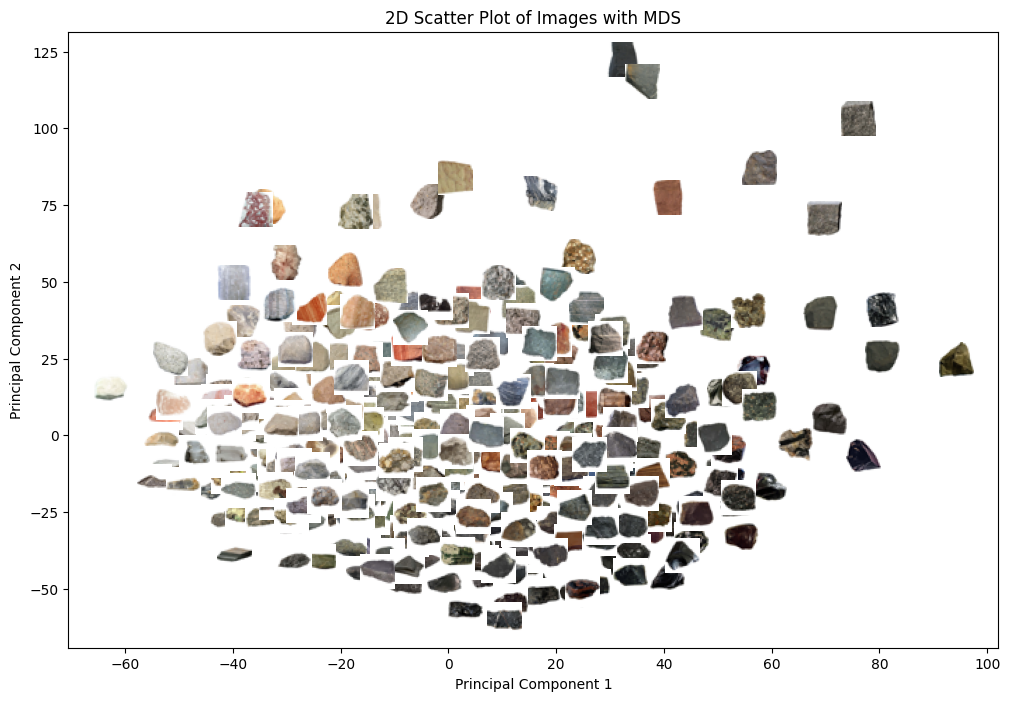

In [29]:
plt.figure(figsize=(12, 8))
for label in np.unique(encoded_labels):
  indices = np.where(np.array(encoded_labels) == label)[0]
  plt.scatter(mds_transformed_data[indices, 0], mds_transformed_data[indices, 1], label=f'Category {label}', alpha=0.7)

for i in range(len(images)):
    image_data = images[i]
    image_pil = Image.fromarray(image_data)
    image_thumbnail = image_pil.resize((25, 25))
    image = OffsetImage(image_thumbnail)#, zoom=1.0)
    ab = AnnotationBbox(image, mds_transformed_data[i], frameon=False)
    plt.gca().add_artist(ab)

plt.title('2D Scatter Plot of Images with MDS')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Question 3 C**

Observations from Dimensionality Reduction (PCA, t-SNE, LLE, MDS):

1. PCA:

Cluster separation is not perfect but still reveals broad groupings of categories. It’s effective for capturing variance but struggles with non-linear separability.
Images appear grouped by category, but the boundaries are not sharp.

2. t-SNE:

Better separation of categories with tight, well-defined clusters, showing clearer groupings. It excels in preserving local structure and non-linear relationships.
3. LLE:

Preserves local structure but separation is less distinct compared to t-SNE. It works well for understanding local relationships but doesn't provide as clear clustering.

4. MDS:

Focuses on global structure and pairwise distances. The categories are more spread out and less distinct, making it less effective at separating categories compared to t-SNE.

Key Takeaways:

Best for clustering: t-SNE

Best for global structure: MDS

Best for variance capture: PCA

Best for local relationships: LLE

In [30]:
# Question 4A

human_data = np.loadtxt('mds_360.txt')

print(human_data)

[[-3.743 -1.204  2.001 ... -1.992  4.95   1.695]
 [ 2.332  1.625  0.985 ...  0.093  6.724  0.708]
 [ 0.346  1.49  -3.795 ... -3.786  0.706 -2.854]
 ...
 [-3.475 -3.431 -2.184 ... -2.265  1.129 -1.201]
 [-0.051 -2.358  1.994 ...  7.268 -0.593 -1.432]
 [ 1.134 -4.9    0.983 ...  4.695  0.624 -1.195]]


In [31]:
from scipy.spatial import procrustes
from scipy.stats import pearsonr

images = []

for file in extracted_files:
  image_path = os.path.join(new_folder_path, file)
  image = Image.open(image_path)
  resized_image = image.resize((25, 25))
  images.append(resized_image)

images = np.array(images)

n_samples, h, w, c = images.shape
flattened_images = images.reshape(n_samples, -1)

embeddings_scaled = scaler.fit_transform(flattened_images)

pca = PCA(n_components = 8)
pca_embeddings = pca.fit_transform(embeddings_scaled)

tsne = TSNE(n_components = 8, method='exact')
tsne_embeddings = tsne.fit_transform(embeddings_scaled)

lle = LocallyLinearEmbedding(n_components = 8)
lle_embeddings = lle.fit_transform(embeddings_scaled)

mds = MDS(n_components = 8)
mds_embeddings = mds.fit_transform(embeddings_scaled)

In [32]:
def procrustes_analysis(human_features, embedding_data):
  mtx1, mtx2, disparity = procrustes(human_features, embedding_data)
  return mtx1, mtx2, disparity

def compute_correlation_coefficient(mtx1, mtx2):
  correlations = []
  for i in range(mtx1.shape[1]):
    corr, _ = pearsonr(mtx1[:, i], mtx2[:, i])
    correlations.append(corr)
  return correlations

In [33]:
import pandas as pd

methods = ['PCA', 't-SNE', 'LLE', 'MDS']
embeddings_list = [pca_embeddings, tsne_embeddings, lle_embeddings, mds_embeddings]
disparities = {}
correlations_table = pd.DataFrame(columns=['Method'] + [f'Dim {i+1}' for i in range(8)])

for embeddings, method in zip(embeddings_list, methods):
  mtx1, mtx2, disparity = procrustes_analysis(human_data, embeddings)
  disparities[method] = disparity

  correlations = compute_correlation_coefficient(mtx1, mtx2)

  row = {'Method': method}
  for i, corr in enumerate(correlations):
    row[f'Dim {i+1}'] = corr

  row_df = pd.DataFrame([row])
  correlations_table = pd.concat([correlations_table, row_df], ignore_index=True)

print("Disparity Values from Procrustes Analysis:")
for method in methods:
    print(f"{method}: {disparities[method]:.6f}")

correlations_table.set_index('Method', inplace=True)

print("\nCorrelation Coefficients Between Each Dimension After Procrustes Alignment:")
print(correlations_table)

Disparity Values from Procrustes Analysis:
PCA: 0.983722
t-SNE: 0.984837
LLE: 0.983413
MDS: 0.983097

Correlation Coefficients Between Each Dimension After Procrustes Alignment:
           Dim 1     Dim 2     Dim 3     Dim 4     Dim 5     Dim 6     Dim 7  \
Method                                                                         
PCA     0.154867  0.127018  0.122136  0.129773  0.130732  0.147745  0.088530   
t-SNE   0.131501  0.105405  0.155721  0.122718  0.098417  0.131352  0.130515   
LLE     0.167500  0.105778  0.129662  0.117440  0.090436  0.170684  0.123160   
MDS     0.143917  0.109235  0.166355  0.121645  0.161398  0.138811  0.089253   

           Dim 8  
Method            
PCA     0.094082  
t-SNE   0.109246  
LLE     0.107663  
MDS     0.107074  


<ipython-input-33-4f4d40195a54>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlations_table = pd.concat([correlations_table, row_df], ignore_index=True)


In [34]:
# Question 5A

images = []

for image in extracted_files:
  image_path = os.path.join(new_folder_path, image)
  image = Image.open(image_path)
  image_resize = image.resize((25, 25))
  images.append(image_resize)

images = np.array(images)

n_samples, h, w, c = images.shape
flattened_images = images.reshape(n_samples, -1)

In [35]:
from sklearn.cluster import KMeans

pca_data_scaled = scaler.fit_transform(flattened_images)

pca = PCA(n_components= 117, random_state=42)
pca_transformed_data = pca.fit_transform(pca_data_scaled)

reconstructed_images_flattened = pca.inverse_transform(pca_transformed_data)
reconstructed_images_flattened = scaler.inverse_transform(reconstructed_images_flattened)
reconstructed_images = reconstructed_images_flattened.reshape(n_samples, h, w, c)



In [36]:
inertia = []
k_range = range(1,11)
for k in k_range:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(reconstructed_images_flattened)
  inertia.append(model.inertia_)

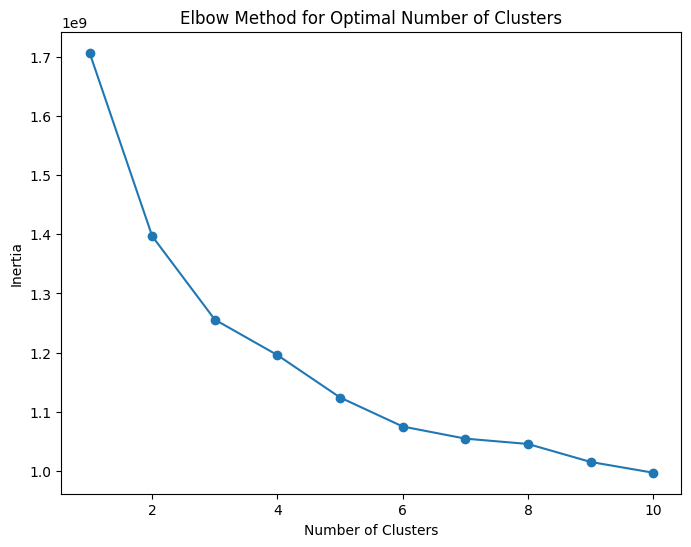

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Interpretation of the Elbow Method:

X-axis: Represents the number of clusters (k), ranging from 1 to 10.

Y-axis: Represents the inertia (within-cluster sum of squares), which measures the compactness of the clusters. Lower inertia indicates that the clusters are more tightly packed.

**Optimal Number of Clusters:**

The elbow point appears to be at **k=3**, where the inertia decreases sharply, and then the decrease slows down. This suggests that 3 clusters is the optimal number for K-Means clustering, as adding more clusters after that doesn't significantly improve the compactness of the clusters.

In [38]:
# Question 5B

print(encoded_labels)
# I = 0, M = 1, S = 2

[2 0 2 1 0 0 2 1 0 0 1 0 0 0 0 0 1 2 0 1 0 1 1 0 0 2 2 0 0 2 2 0 1 1 1 2 0
 2 1 0 2 2 0 1 0 0 0 0 2 1 2 2 2 2 2 1 0 0 0 2 1 0 1 2 1 2 1 0 0 0 1 0 0 2
 0 1 2 1 0 1 2 2 2 1 0 0 2 0 0 2 1 1 2 1 0 1 0 1 2 2 1 0 0 1 1 1 1 1 0 2 2
 1 2 1 0 2 1 0 2 0 1 2 1 1 2 1 2 1 1 0 0 0 2 0 2 0 1 0 0 1 0 0 1 1 0 1 2 2
 2 0 2 1 0 0 2 2 2 2 2 0 2 1 0 1 1 2 1 2 1 1 0 2 1 2 0 2 2 1 1 0 1 2 2 1 1
 1 2 0 1 2 0 0 1 1 2 1 2 2 0 1 1 0 1 2 2 2 0 2 2 1 0 2 1 2 1 0 2 0 2 1 2 0
 1 2 2 2 0 1 1 2 0 2 0 2 0 1 1 2 2 1 1 0 0 1 1 2 2 0 2 1 2 2 2 0 0 1 2 2 0
 0 0 1 0 0 2 1 1 1 1 0 2 1 0 2 2 0 0 2 0 0 0 0 1 0 2 0 2 2 2 2 1 2 1 2 0 2
 1 1 1 2 0 2 2 1 2 0 0 0 1 1 2 0 0 1 0 2 1 1 0 0 0 1 1 1 1 0 2 2 0 1 2 0 1
 1 0 2 1 0 2 1 1 1 2 1 2 1 1 1 2 1 2 0 0 0 0 2 1 1 2 0]


In [39]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score

model = KMeans(n_clusters=3, random_state=42)

#model.fit(reconstructed_images_flattened)

predicted_labels = model.fit_predict(reconstructed_images_flattened)

ari = adjusted_rand_score(encoded_labels, predicted_labels)
homogeneity = homogeneity_score(encoded_labels, predicted_labels)

print(predicted_labels, encoded_labels)
print(ari)
print(homogeneity)

[1 1 0 1 0 1 0 2 2 0 0 0 2 0 2 0 1 2 2 2 2 0 0 1 2 0 1 1 2 2 1 2 1 1 1 1 1
 0 0 0 2 0 1 2 0 0 2 1 2 1 1 2 1 0 2 0 1 0 2 0 2 0 0 0 2 1 1 0 2 1 0 1 0 2
 2 0 2 0 0 1 1 2 0 1 0 2 2 1 2 0 0 1 2 2 1 1 0 2 1 0 2 2 2 1 1 1 0 2 1 1 0
 2 1 0 1 2 0 0 0 2 1 2 0 0 2 2 0 1 1 1 1 1 2 2 0 2 2 1 1 2 0 2 1 2 1 1 1 1
 1 0 1 2 1 2 0 0 1 0 1 1 2 2 2 1 1 0 2 0 0 2 0 0 1 1 1 1 1 1 1 2 0 1 1 2 1
 0 0 2 0 0 2 1 0 1 1 0 1 2 2 1 2 1 1 1 1 2 2 1 2 0 2 0 2 1 1 1 1 2 1 2 2 2
 2 1 0 0 1 2 2 2 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 1 2 1 1 0 1 2 1 0
 1 2 1 1 0 0 0 2 1 0 2 1 1 1 0 0 1 0 2 2 2 1 2 1 1 2 1 1 1 1 1 2 1 1 2 1 1
 0 2 0 0 2 2 1 0 2 2 1 0 2 1 2 0 2 0 2 1 1 2 1 1 1 2 1 0 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 0 2 1 2 1 0 1 1 1 1 1 2 2 2 2 0 2 1 0 2 1 2] [2 0 2 1 0 0 2 1 0 0 1 0 0 0 0 0 1 2 0 1 0 1 1 0 0 2 2 0 0 2 2 0 1 1 1 2 0
 2 1 0 2 2 0 1 0 0 0 0 2 1 2 2 2 2 2 1 0 0 0 2 1 0 1 2 1 2 1 0 0 0 1 0 0 2
 0 1 2 1 0 1 2 2 2 1 0 0 2 0 0 2 1 1 2 1 0 1 0 1 2 2 1 0 0 1 1 1 1 1 0 2 2
 1 2 1 0 2 1 0 2 0 1 2 1 1 2 1 2 1 1 0 0 0 2

In [40]:
from sklearn.metrics import classification_report

result = classification_report(predicted_labels, encoded_labels)

In [41]:
print(result)

              precision    recall  f1-score   support

           0       0.27      0.29      0.28       109
           1       0.38      0.32      0.35       140
           2       0.27      0.29      0.28       111

    accuracy                           0.30       360
   macro avg       0.30      0.30      0.30       360
weighted avg       0.31      0.30      0.30       360



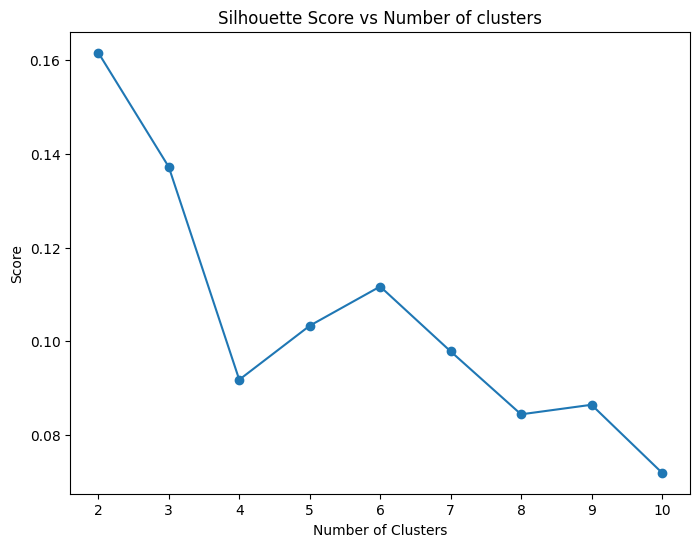

In [42]:
# Question 6A

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

silhouette_scores = []
component_range = range(2,11)
for k in component_range:
  model = GaussianMixture(n_components = k, random_state=42)
  model.fit(reconstructed_images_flattened)
  predicted_labels = model.predict(reconstructed_images_flattened)
  silhouette_scores.append(silhouette_score(reconstructed_images_flattened, predicted_labels))

plt.figure(figsize=(8, 6))
plt.plot(component_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Score vs Number of clusters')
plt.show()


**Optimal Number of Clusters**: Based on the Silhouette Score, the best number of clusters seems to be **k = 2 or 3**. The score is relatively higher at these points compared to higher numbers of clusters, which suggests that the data has a natural grouping with around 2 or 3 clusters.

In [43]:
# Question 6B

model = GaussianMixture(n_components=3, random_state=42)

#model.fit(reconstructed_images_flattened)

predicted_labels = model.fit_predict(reconstructed_images_flattened)

ari = adjusted_rand_score(encoded_labels, predicted_labels)
homogeneity = homogeneity_score(encoded_labels, predicted_labels)

print(predicted_labels, encoded_labels)
print(ari)
print(homogeneity)

[1 1 0 1 0 1 0 2 2 0 0 0 2 0 2 0 1 2 2 2 2 0 0 1 2 0 1 1 2 2 1 2 1 1 1 1 1
 0 0 0 2 0 1 2 0 0 2 1 2 1 1 2 1 0 2 0 1 0 2 0 2 0 0 0 2 1 1 0 2 1 0 1 0 2
 2 0 2 0 0 1 1 2 0 1 0 2 2 1 2 0 0 1 2 2 1 1 0 2 1 0 2 2 2 1 1 1 0 2 1 1 0
 2 1 0 1 2 0 0 0 2 1 2 0 0 2 2 0 1 1 1 1 1 2 2 0 2 2 1 1 2 0 2 1 2 1 1 1 1
 1 0 1 2 1 2 0 0 1 0 1 1 2 2 2 1 1 0 2 0 0 2 0 0 1 1 1 1 1 1 1 2 0 1 1 2 1
 0 0 2 0 0 2 1 0 1 1 0 1 2 2 1 2 1 1 1 1 2 2 1 2 0 2 0 2 1 1 1 1 2 1 2 2 2
 2 1 0 0 1 2 2 2 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 1 2 1 1 0 1 2 1 0
 1 2 1 1 0 0 0 2 1 0 2 1 1 1 0 0 1 0 2 2 2 1 2 1 1 2 1 1 1 1 1 2 1 1 2 1 1
 0 2 0 0 2 2 1 0 2 2 1 0 2 1 2 0 2 0 2 1 1 2 1 1 1 2 1 0 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 0 2 1 2 1 0 1 1 1 1 1 2 2 2 2 0 2 1 0 2 1 2] [2 0 2 1 0 0 2 1 0 0 1 0 0 0 0 0 1 2 0 1 0 1 1 0 0 2 2 0 0 2 2 0 1 1 1 2 0
 2 1 0 2 2 0 1 0 0 0 0 2 1 2 2 2 2 2 1 0 0 0 2 1 0 1 2 1 2 1 0 0 0 1 0 0 2
 0 1 2 1 0 1 2 2 2 1 0 0 2 0 0 2 1 1 2 1 0 1 0 1 2 2 1 0 0 1 1 1 1 1 0 2 2
 1 2 1 0 2 1 0 2 0 1 2 1 1 2 1 2 1 1 0 0 0 2

In [44]:
result = classification_report(predicted_labels, encoded_labels)
print(result)

              precision    recall  f1-score   support

           0       0.27      0.29      0.28       109
           1       0.38      0.32      0.35       140
           2       0.27      0.29      0.28       111

    accuracy                           0.30       360
   macro avg       0.30      0.30      0.30       360
weighted avg       0.31      0.30      0.30       360



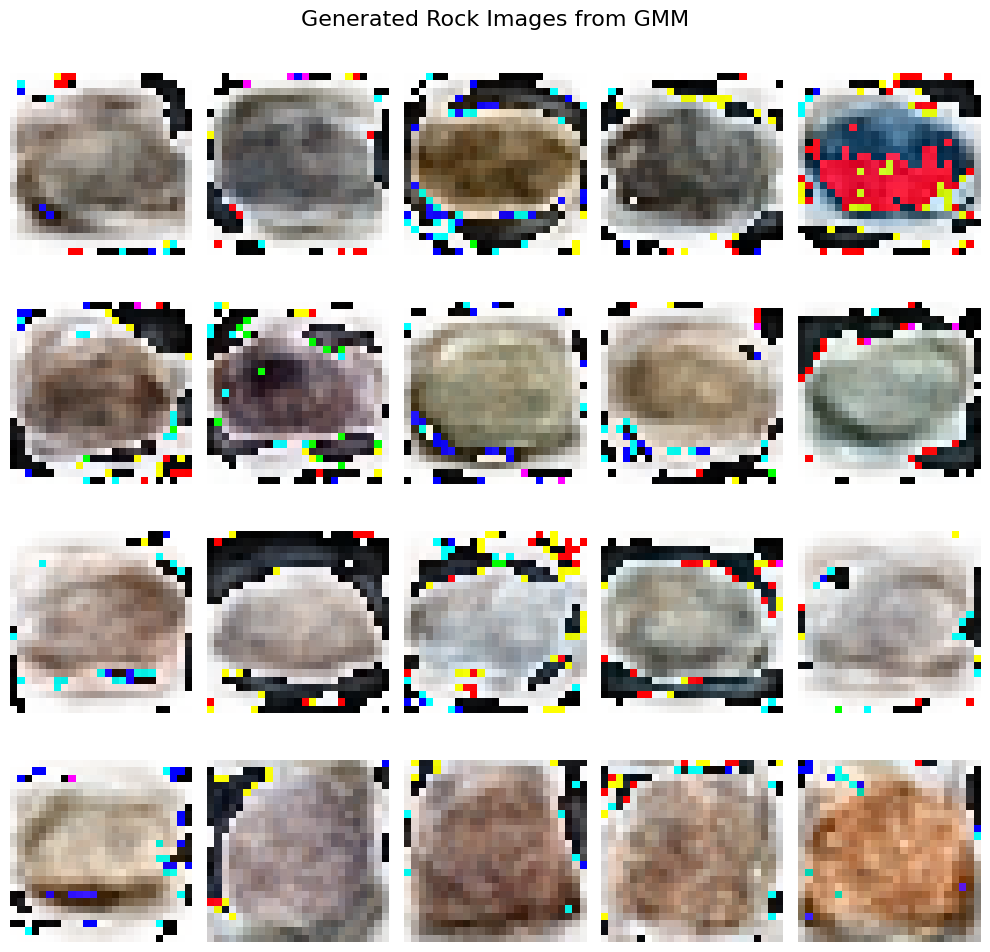

In [45]:
# Question 6C

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(pca_transformed_data)

new_samples, _ = gmm.sample(20)

generated_data = pca.inverse_transform(new_samples)
generated_data = scaler.inverse_transform(generated_data)

generated_images = generated_data.reshape(20, h, w, c)

plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(generated_images[i].astype(np.uint8))
    plt.axis('off')
plt.suptitle("Generated Rock Images from GMM", fontsize=16)
plt.tight_layout()
plt.show()

In [5]:
# Question 7

import zipfile
import os

zip_file_path_validation = '/content/drive/My Drive/120 Rocks.zip'  # Path to my zip file
new_folder_path_validation = '/content/120_rocks_images'  # New folder where images will be stored

os.makedirs(new_folder_path_validation, exist_ok=True)

with zipfile.ZipFile(zip_file_path_validation, 'r') as zip_ref:
    zip_ref.extractall(new_folder_path_validation)

extracted_files_validation = [os.path.join(new_folder_path_validation , f) for f in os.listdir(new_folder_path_validation) if os.path.isfile(os.path.join(new_folder_path_validation, f))]
print(f"Extracted files: {extracted_files_validation}")


Extracted files: ['/content/120_rocks_images/I_Granite_2_120.jpg', '/content/120_rocks_images/S_Rock Gypsum_4_120.jpg', '/content/120_rocks_images/I_Obsidian_1_120.jpg', '/content/120_rocks_images/I_Rhyolite_1_120.jpg', '/content/120_rocks_images/M_Slate_4_120.jpg', '/content/120_rocks_images/S_Breccia_4_120.jpg', '/content/120_rocks_images/M_Anthracite_1_120.jpg', '/content/120_rocks_images/I_Peridotite_2_120.jpg', '/content/120_rocks_images/I_Pegmatite_4_120.jpg', '/content/120_rocks_images/I_Pumice_3_120.jpg', '/content/120_rocks_images/I_Gabbro_1_120.jpg', '/content/120_rocks_images/S_Breccia_2_120.jpg', '/content/120_rocks_images/S_Chert_2_120.jpg', '/content/120_rocks_images/I_Granite_3_120.jpg', '/content/120_rocks_images/M_Marble_1_120.jpg', '/content/120_rocks_images/M_Schist_3_120.jpg', '/content/120_rocks_images/S_Micrite_3_120.jpg', '/content/120_rocks_images/I_Granite_1_120.jpg', '/content/120_rocks_images/M_Gneiss_3_120.jpg', '/content/120_rocks_images/M_Migmatite_2_120.j

In [ ]:
!pip install tensorflow
!pip install keras

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_28 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 98, 98, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 23, 23, 64)        0  

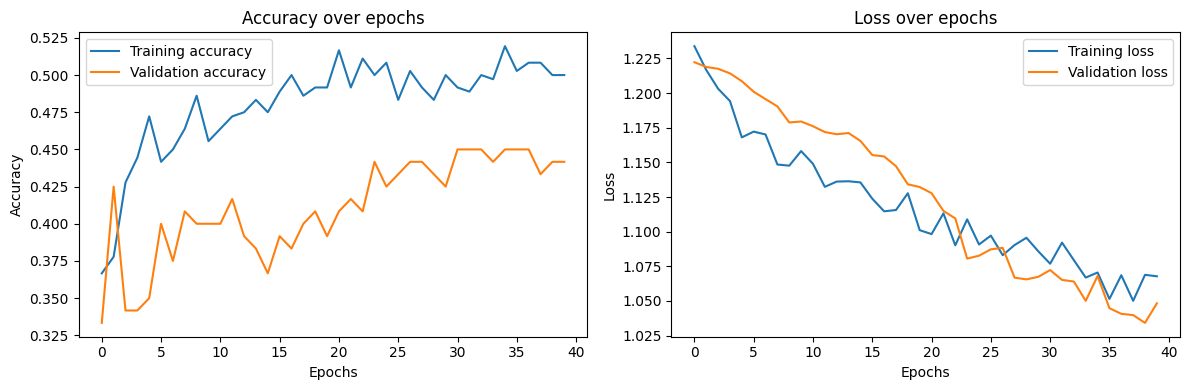

In [18]:
# Question 7B

import numpy as np
import os
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import GlobalAveragePooling2D

def load_images(files, target_size=(100, 100)):
    images = []
    labels = []
    for image_path in files:
        image = load_img(image_path, target_size=target_size)
        image = img_to_array(image) / 255.0

        label = os.path.basename(image_path)[0]
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

train_images, train_labels = load_images(extracted_files)
val_images, val_labels = load_images(extracted_files_validation)

label_dict = {'I': 0, 'M': 1, 'S': 2}
train_labels = np.array([label_dict[label] for label in train_labels])
val_labels = np.array([label_dict[label] for label in val_labels])

train_labels = to_categorical(train_labels, num_classes=3)
val_labels = to_categorical(val_labels, num_classes=3)

inputs = Input(shape=(100, 100, 3))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

x = Dense(8, activation='relu')(x)

outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

start_time = time.time()

history = model.fit(train_images, train_labels, epochs=40, batch_size=16, validation_data=(val_images, val_labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
# Question 7A

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 345.56 seconds


**Q 7C**

Summing up the bias parameters from each layer:

Conv2D Layer 1 Biases: 32

Conv2D Layer 2 Biases: 64

Conv2D Layer 3 Biases: 128

Dense Layer 1 Biases: 256

Dense Layer 2 Biases: 128

Dense Layer 3 Biases: 64

Dense Layer 4 Biases: 8

Output Layer Biases: 3

Total Biases:

Total Number of Bias Parameters: 683

In [20]:
# Question 7D

import numpy as np
import pandas as pd
import time
from tensorflow.keras.models import Model
from scipy.spatial import procrustes
from scipy.stats import pearsonr

second_last_layer_model = Model(inputs=model.input,
                                outputs=model.layers[-2].output)

train_activations = second_last_layer_model.predict(train_images)
val_activations = second_last_layer_model.predict(val_images)

human_train_data = np.loadtxt('mds_360.txt')
human_val_data = np.loadtxt('mds_120.txt')

mtx1_train, mtx2_train, disparity_train = procrustes(human_train_data, train_activations)

correlations_train = []
for i in range(mtx1_train.shape[1]):
    corr, _ = pearsonr(mtx1_train[:, i], mtx2_train[:, i])
    correlations_train.append(corr)

mtx1_val, mtx2_val, disparity_val = procrustes(human_val_data, val_activations)

correlations_val = []
for i in range(mtx1_val.shape[1]):
    corr, _ = pearsonr(mtx1_val[:, i], mtx2_val[:, i])
    correlations_val.append(corr)

train_results = {
    'Dimension': [f'Dim {i+1}' for i in range(mtx1_train.shape[1])] + ['Disparity'],
    'Correlation': correlations_train + [disparity_train]
}
train_df = pd.DataFrame(train_results)

val_results = {
    'Dimension': [f'Dim {i+1}' for i in range(mtx1_val.shape[1])] + ['Disparity'],
    'Correlation': correlations_val + [disparity_val]
}
val_df = pd.DataFrame(val_results)

print("Training Data Comparison:")
print(train_df)

print("\nValidation Data Comparison:")
print(val_df)


4/4 [==============================] - 0s 102ms/step
Training Data Comparison:
   Dimension  Correlation
0      Dim 1     0.075839
1      Dim 2     0.150575
2      Dim 3     0.096098
3      Dim 4     0.100977
4      Dim 5     0.077720
5      Dim 6     0.031862
6      Dim 7     0.050977
7      Dim 8     0.129741
8  Disparity     0.993299

Validation Data Comparison:
   Dimension  Correlation
0      Dim 1     0.168269
1      Dim 2     0.104630
2      Dim 3     0.188405
3      Dim 4     0.097024
4      Dim 5     0.118812
5      Dim 6     0.071927
6      Dim 7     0.137544
7      Dim 8     0.129454
8  Disparity     0.986859
